<a href="https://colab.research.google.com/github/felipeescorel/VMLampiao/blob/master/LampiaoClienteFinalModeloDiferenciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import optimizers

from keras.models import Sequential
from keras.regularizers import l2
from keras.layers.core import Dense, Dropout



In [14]:
!git clone https://github.com/felipeescorel/redes_neurais.git

fatal: destination path 'redes_neurais' already exists and is not an empty directory.


In [0]:
data =  pd.read_csv('redes_neurais/ClientesVM/datasetV6.csv')

In [0]:
def instance_model():
      model = Sequential()
      model.add(Dense(2048,input_dim=input_dim,
                  activation ='relu',
                  kernel_initializer='random_uniform',
                  #bias_initializer='zeros',
                  kernel_regularizer=l2(1e-4),
                  bias_regularizer=l2(1e-4),))
      model.add(Dropout(rate=0.15))
      model.add(Dense(1024,activation='relu',))
                  #kernel_initializer='random_uniform',
                  #bias_initializer='zeros',
                  #kernel_regularizer=l2(1e-4),
                  #bias_regularizer=l2(1e-4),))
      model.add(Dropout(rate=0.15))
      model.add(Dense(1024,activation='relu',))
                  #kernel_initializer='random_uniform',
                  #bias_initializer='zeros',
                  #kernel_regularizer=l2(1e-4),
                  #bias_regularizer=l2(1e-4),))
      model.add(Dropout(rate=0.15))
      model.add(Dense(512,activation='relu'))
                  #kernel_initializer='random_uniform',
                  #bias_initializer='zeros',
                  #kernel_regularizer=l2(1e-4),
                  #bias_regularizer=l2(1e-4),))
      model.add(Dropout(rate=0.15))
      model.add(Dense(256,activation='relu',))
                  #kernel_initializer='random_uniform',
                  #bias_initializer='zeros',
                  #kernel_regularizer=l2(1e-4),
                  #bias_regularizer=l2(1e-4),))
      model.add(Dropout(rate=0.15))
      model.add(Dense(128,activation='relu',))
                  #kernel_initializer='random_uniform',
                  #bias_initializer='zeros',
                  #kernel_regularizer=l2(1e-4),
                  #bias_regularizer=l2(1e-4),))

      model.add(Dropout(rate=0.15))
      model.add(Dense(1, activation='sigmoid',))
                  #kernel_initializer='random_uniform',
                  #bias_initializer='zeros',
                  #kernel_regularizer=l2(1e-4),
                  #bias_regularizer=l2(1e-4),))
      return model

# Normalização de colunas com valores discrepantes  

x = (x - min)/(max -min)

In [0]:
data['rendaMedia'] = data['rendaMedia'].map(lambda x: (x - data['rendaMedia'].min())/(data['rendaMedia'].max()-data['rendaMedia'].min()) )

In [0]:
data['cidade_id'] = data['cidade_id'].map(lambda x: (x - data['cidade_id'].min())/(data['cidade_id'].max()-data['cidade_id'].min()) ) 

In [0]:
data['Idade'] = data['Idade'].map(lambda x: (x - data['Idade'].min())/(data['Idade'].max()-data['Idade'].min()) )

# Separando conjuntos de treino e teste

> 80% treino, 20% teste



In [0]:
train, test = train_test_split(data, test_size=0.2)
labels = train.loc[:,'id']
X_train = train.iloc[:,1:-1]
y_train = train.loc[:,'Aprovado']
X_test = test.iloc[:,1:-1]
y_test = test.loc[:,'Aprovado']

In [21]:
input_dim = X_train.shape[1]
epochs = 400
model = instance_model()
adam = optimizers.Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=adam ,metrics=['accuracy'])

W0619 16:22:39.765948 139928332015488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0619 16:22:39.803231 139928332015488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 16:22:39.810317 139928332015488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0619 16:22:39.846150 139928332015488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0619 16:22:39.858387 

# Testes

In [22]:
print("Training...")
history = model.fit(X_train,y_train, epochs=epochs, batch_size=32, validation_split=0.15, verbose=2, shuffle = True)


Training...
Train on 9520 samples, validate on 1680 samples
Epoch 1/400
 - 2s - loss: 0.6870 - acc: 0.5712 - val_loss: 0.6784 - val_acc: 0.5827
Epoch 2/400
 - 1s - loss: 0.6804 - acc: 0.5755 - val_loss: 0.6703 - val_acc: 0.6048
Epoch 3/400
 - 1s - loss: 0.6728 - acc: 0.5940 - val_loss: 0.6627 - val_acc: 0.6125
Epoch 4/400
 - 1s - loss: 0.6683 - acc: 0.5944 - val_loss: 0.6613 - val_acc: 0.6018
Epoch 5/400
 - 1s - loss: 0.6661 - acc: 0.6038 - val_loss: 0.6566 - val_acc: 0.6131
Epoch 6/400
 - 1s - loss: 0.6629 - acc: 0.6006 - val_loss: 0.6541 - val_acc: 0.6208
Epoch 7/400
 - 1s - loss: 0.6594 - acc: 0.6041 - val_loss: 0.6515 - val_acc: 0.6030
Epoch 8/400
 - 1s - loss: 0.6557 - acc: 0.6032 - val_loss: 0.6482 - val_acc: 0.6012
Epoch 9/400
 - 1s - loss: 0.6539 - acc: 0.6032 - val_loss: 0.6441 - val_acc: 0.6167
Epoch 10/400
 - 1s - loss: 0.6499 - acc: 0.6100 - val_loss: 0.6414 - val_acc: 0.6143
Epoch 11/400
 - 1s - loss: 0.6489 - acc: 0.6097 - val_loss: 0.6394 - val_acc: 0.6262
Epoch 12/400
 

In [23]:
score = model.evaluate(X_test,y_test,64)
print(score[1])

2800/2800 [==============================] - 0s 18us/step
0.6635714282308306


# Learning Rate 0,0001 - Adam,  Nadam, Adamax


<function matplotlib.pyplot.show>

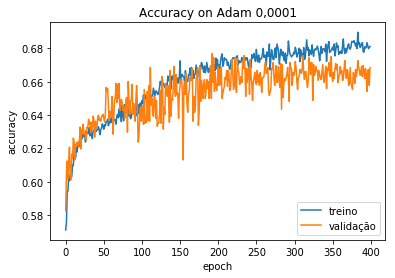

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy on Adam 0,0001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['treino','validação'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

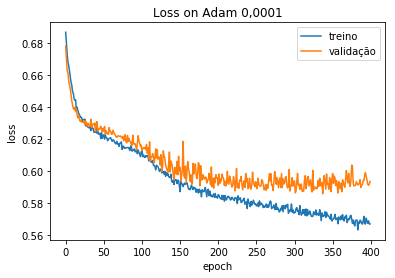

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss on Adam 0,0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['treino','validação'],loc='upper right')
plt.show

In [0]:
model = instance_model()
adam = optimizers.Nadam(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=adam ,metrics=['accuracy'])

In [27]:
history2 = model.fit(X_train,y_train, epochs=epochs, batch_size=32, validation_split=0.15, verbose=2, shuffle = True)


Train on 9520 samples, validate on 1680 samples
Epoch 1/400
 - 2s - loss: 0.6853 - acc: 0.5692 - val_loss: 0.6762 - val_acc: 0.5827
Epoch 2/400
 - 1s - loss: 0.6775 - acc: 0.5829 - val_loss: 0.6692 - val_acc: 0.6060
Epoch 3/400
 - 1s - loss: 0.6734 - acc: 0.5921 - val_loss: 0.6664 - val_acc: 0.5976
Epoch 4/400
 - 1s - loss: 0.6674 - acc: 0.5986 - val_loss: 0.6608 - val_acc: 0.6179
Epoch 5/400
 - 1s - loss: 0.6657 - acc: 0.5961 - val_loss: 0.6582 - val_acc: 0.6012
Epoch 6/400
 - 1s - loss: 0.6634 - acc: 0.6008 - val_loss: 0.6555 - val_acc: 0.5929
Epoch 7/400
 - 1s - loss: 0.6611 - acc: 0.6009 - val_loss: 0.6547 - val_acc: 0.5815
Epoch 8/400
 - 1s - loss: 0.6549 - acc: 0.6019 - val_loss: 0.6471 - val_acc: 0.5994
Epoch 9/400
 - 1s - loss: 0.6529 - acc: 0.6055 - val_loss: 0.6443 - val_acc: 0.6042
Epoch 10/400
 - 1s - loss: 0.6502 - acc: 0.6067 - val_loss: 0.6414 - val_acc: 0.6155
Epoch 11/400
 - 1s - loss: 0.6502 - acc: 0.6114 - val_loss: 0.6393 - val_acc: 0.6208
Epoch 12/400
 - 1s - loss:

In [28]:
score = model.evaluate(X_test,y_test)
print(score[1])

2800/2800 [==============================] - 0s 30us/step
0.6657142857142857


<function matplotlib.pyplot.show>

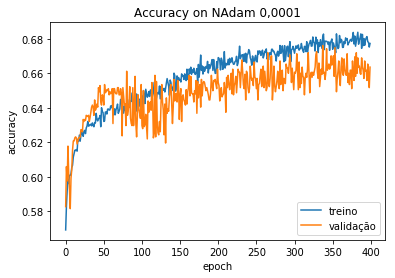

In [29]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Accuracy on NAdam 0,0001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['treino','validação'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

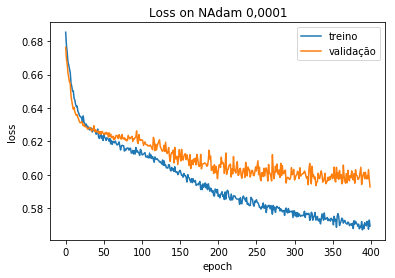

In [30]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss on NAdam 0,0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['treino','validação'],loc='upper right')
plt.show

In [0]:
model = instance_model()
adam = optimizers.Adamax(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=adam ,metrics=['accuracy'])

In [32]:
history3 = model.fit(X_train,y_train, epochs=epochs, batch_size=32, validation_split=0.15, verbose=2, shuffle = True)


Train on 9520 samples, validate on 1680 samples
Epoch 1/400
 - 2s - loss: 0.6909 - acc: 0.5449 - val_loss: 0.6861 - val_acc: 0.5827
Epoch 2/400
 - 1s - loss: 0.6862 - acc: 0.5697 - val_loss: 0.6815 - val_acc: 0.5827
Epoch 3/400
 - 1s - loss: 0.6844 - acc: 0.5700 - val_loss: 0.6792 - val_acc: 0.5827
Epoch 4/400
 - 1s - loss: 0.6829 - acc: 0.5707 - val_loss: 0.6773 - val_acc: 0.5827
Epoch 5/400
 - 1s - loss: 0.6818 - acc: 0.5747 - val_loss: 0.6757 - val_acc: 0.6030
Epoch 6/400
 - 1s - loss: 0.6808 - acc: 0.5803 - val_loss: 0.6741 - val_acc: 0.6012
Epoch 7/400
 - 1s - loss: 0.6794 - acc: 0.5834 - val_loss: 0.6725 - val_acc: 0.6006
Epoch 8/400
 - 1s - loss: 0.6777 - acc: 0.5850 - val_loss: 0.6712 - val_acc: 0.5976
Epoch 9/400
 - 1s - loss: 0.6763 - acc: 0.5892 - val_loss: 0.6703 - val_acc: 0.6060
Epoch 10/400
 - 1s - loss: 0.6748 - acc: 0.5925 - val_loss: 0.6684 - val_acc: 0.6060
Epoch 11/400
 - 1s - loss: 0.6734 - acc: 0.5928 - val_loss: 0.6672 - val_acc: 0.6131
Epoch 12/400
 - 1s - loss:

In [33]:
score = model.evaluate(X_test,y_test)
print(score[1])

2800/2800 [==============================] - 0s 31us/step
0.655


<function matplotlib.pyplot.show>

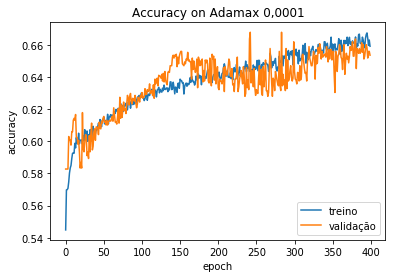

In [34]:
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('Accuracy on Adamax 0,0001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['treino','validação'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

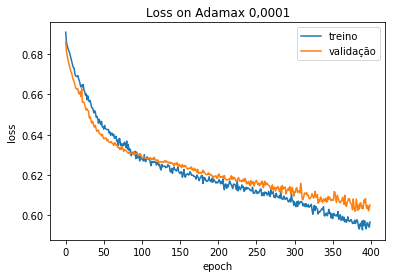

In [35]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Loss on Adamax 0,0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['treino','validação'],loc='upper right')
plt.show

<function matplotlib.pyplot.show>

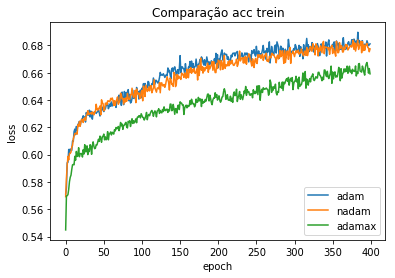

In [36]:
plt.plot(history.history['acc'])
plt.plot(history2.history['acc'])
plt.plot(history3.history['acc'])
# plt.plot(history4.history['acc'])


plt.title('Comparação acc trein')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam','adamax'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

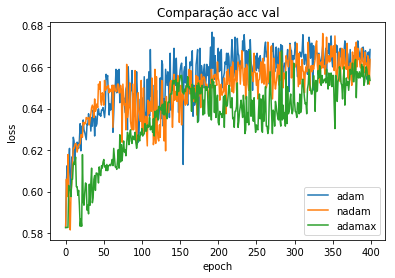

In [37]:
plt.plot(history.history['val_acc'])
plt.plot(history2.history['val_acc'])
plt.plot(history3.history['val_acc'])
# plt.plot(history4.history['val_acc'])


plt.title('Comparação acc val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam','adamax'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

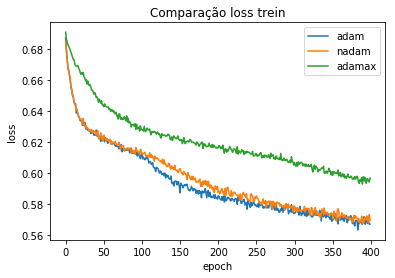

In [38]:
plt.plot(history.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
# plt.plot(history4.history['loss'])

plt.title('Comparação loss trein')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam','adamax'],loc='upper right')
plt.show

<function matplotlib.pyplot.show>

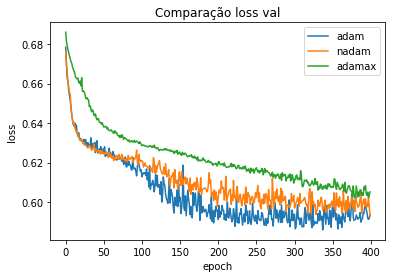

In [39]:
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
# plt.plot(history4.history['val_loss'])


plt.title('Comparação loss val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam','adamax'],loc='upper right')
plt.show

# Learning rate 0.0002 , 0.0005, 0.00001 on Adam, NAdam

In [40]:
model = instance_model()
adam = optimizers.Adam(lr=0.0002)
model.compile(loss='binary_crossentropy', optimizer=adam ,metrics=['accuracy'])
history4 = model.fit(X_train,y_train, epochs=epochs, batch_size=32, validation_split=0.15, verbose=2, shuffle = True)
score = model.evaluate(X_test,y_test)
print(score[1])


Train on 9520 samples, validate on 1680 samples
Epoch 1/400
 - 2s - loss: 0.6835 - acc: 0.5720 - val_loss: 0.6706 - val_acc: 0.5923
Epoch 2/400
 - 1s - loss: 0.6724 - acc: 0.5911 - val_loss: 0.6677 - val_acc: 0.5821
Epoch 3/400
 - 1s - loss: 0.6651 - acc: 0.5956 - val_loss: 0.6531 - val_acc: 0.5857
Epoch 4/400
 - 1s - loss: 0.6597 - acc: 0.5956 - val_loss: 0.6471 - val_acc: 0.6119
Epoch 5/400
 - 1s - loss: 0.6507 - acc: 0.6097 - val_loss: 0.6447 - val_acc: 0.6071
Epoch 6/400
 - 1s - loss: 0.6491 - acc: 0.6067 - val_loss: 0.6404 - val_acc: 0.6131
Epoch 7/400
 - 1s - loss: 0.6462 - acc: 0.6120 - val_loss: 0.6381 - val_acc: 0.6238
Epoch 8/400
 - 1s - loss: 0.6412 - acc: 0.6193 - val_loss: 0.6367 - val_acc: 0.6280
Epoch 9/400
 - 1s - loss: 0.6421 - acc: 0.6170 - val_loss: 0.6355 - val_acc: 0.6280
Epoch 10/400
 - 1s - loss: 0.6391 - acc: 0.6178 - val_loss: 0.6332 - val_acc: 0.6280
Epoch 11/400
 - 1s - loss: 0.6367 - acc: 0.6193 - val_loss: 0.6357 - val_acc: 0.6268
Epoch 12/400
 - 1s - loss:

In [41]:
model = instance_model()
adam = optimizers.Nadam(lr=0.0002)
model.compile(loss='binary_crossentropy', optimizer=adam ,metrics=['accuracy'])
history5 = model.fit(X_train,y_train, epochs=epochs, batch_size=32, validation_split=0.15, verbose=2, shuffle = True)
score = model.evaluate(X_test,y_test)
print(score[1])


Train on 9520 samples, validate on 1680 samples
Epoch 1/400
 - 2s - loss: 0.6820 - acc: 0.5735 - val_loss: 0.6762 - val_acc: 0.5911
Epoch 2/400
 - 1s - loss: 0.6697 - acc: 0.5914 - val_loss: 0.6618 - val_acc: 0.6155
Epoch 3/400
 - 1s - loss: 0.6629 - acc: 0.5904 - val_loss: 0.6554 - val_acc: 0.5964
Epoch 4/400
 - 1s - loss: 0.6560 - acc: 0.6001 - val_loss: 0.6566 - val_acc: 0.5946
Epoch 5/400
 - 1s - loss: 0.6526 - acc: 0.6081 - val_loss: 0.6547 - val_acc: 0.5863
Epoch 6/400
 - 1s - loss: 0.6483 - acc: 0.6068 - val_loss: 0.6386 - val_acc: 0.6196
Epoch 7/400
 - 1s - loss: 0.6456 - acc: 0.6084 - val_loss: 0.6370 - val_acc: 0.6190
Epoch 8/400
 - 1s - loss: 0.6433 - acc: 0.6128 - val_loss: 0.6374 - val_acc: 0.6238
Epoch 9/400
 - 1s - loss: 0.6388 - acc: 0.6168 - val_loss: 0.6335 - val_acc: 0.6214
Epoch 10/400
 - 1s - loss: 0.6386 - acc: 0.6207 - val_loss: 0.6341 - val_acc: 0.6268
Epoch 11/400
 - 1s - loss: 0.6357 - acc: 0.6217 - val_loss: 0.6326 - val_acc: 0.6250
Epoch 12/400
 - 1s - loss:

In [42]:
model = instance_model()
adam = optimizers.Adam(lr=0.0005)
model.compile(loss='binary_crossentropy', optimizer=adam ,metrics=['accuracy'])
history6 = model.fit(X_train,y_train, epochs=epochs, batch_size=32, validation_split=0.15, verbose=2, shuffle = True)
score = model.evaluate(X_test,y_test)
print(score[1])


Train on 9520 samples, validate on 1680 samples
Epoch 1/400
 - 2s - loss: 0.6780 - acc: 0.5757 - val_loss: 0.6625 - val_acc: 0.6101
Epoch 2/400
 - 1s - loss: 0.6637 - acc: 0.5991 - val_loss: 0.6540 - val_acc: 0.6143
Epoch 3/400
 - 1s - loss: 0.6522 - acc: 0.6093 - val_loss: 0.6408 - val_acc: 0.6268
Epoch 4/400
 - 1s - loss: 0.6437 - acc: 0.6144 - val_loss: 0.6404 - val_acc: 0.6232
Epoch 5/400
 - 1s - loss: 0.6422 - acc: 0.6162 - val_loss: 0.6410 - val_acc: 0.6083
Epoch 6/400
 - 1s - loss: 0.6405 - acc: 0.6144 - val_loss: 0.6493 - val_acc: 0.6298
Epoch 7/400
 - 1s - loss: 0.6371 - acc: 0.6196 - val_loss: 0.6411 - val_acc: 0.6262
Epoch 8/400
 - 1s - loss: 0.6376 - acc: 0.6180 - val_loss: 0.6309 - val_acc: 0.6286
Epoch 9/400
 - 1s - loss: 0.6356 - acc: 0.6231 - val_loss: 0.6372 - val_acc: 0.6327
Epoch 10/400
 - 1s - loss: 0.6338 - acc: 0.6261 - val_loss: 0.6333 - val_acc: 0.6238
Epoch 11/400
 - 1s - loss: 0.6335 - acc: 0.6230 - val_loss: 0.6306 - val_acc: 0.6315
Epoch 12/400
 - 1s - loss:

In [43]:
model = instance_model()
adam = optimizers.Nadam(lr=0.0005)
model.compile(loss='binary_crossentropy', optimizer=adam ,metrics=['accuracy'])
history7 = model.fit(X_train,y_train, epochs=epochs, batch_size=32, validation_split=0.15, verbose=2, shuffle = True)
score = model.evaluate(X_test,y_test)
print(score[1])


Train on 9520 samples, validate on 1680 samples
Epoch 1/400
 - 3s - loss: 0.6806 - acc: 0.5750 - val_loss: 0.6640 - val_acc: 0.6125
Epoch 2/400
 - 1s - loss: 0.6656 - acc: 0.6005 - val_loss: 0.6525 - val_acc: 0.6226
Epoch 3/400
 - 1s - loss: 0.6568 - acc: 0.6076 - val_loss: 0.6466 - val_acc: 0.6262
Epoch 4/400
 - 1s - loss: 0.6493 - acc: 0.6105 - val_loss: 0.6397 - val_acc: 0.6125
Epoch 5/400
 - 1s - loss: 0.6441 - acc: 0.6188 - val_loss: 0.6343 - val_acc: 0.6208
Epoch 6/400
 - 1s - loss: 0.6385 - acc: 0.6215 - val_loss: 0.6356 - val_acc: 0.6256
Epoch 7/400
 - 1s - loss: 0.6389 - acc: 0.6199 - val_loss: 0.6366 - val_acc: 0.6214
Epoch 8/400
 - 1s - loss: 0.6360 - acc: 0.6241 - val_loss: 0.6332 - val_acc: 0.6244
Epoch 9/400
 - 1s - loss: 0.6390 - acc: 0.6216 - val_loss: 0.6308 - val_acc: 0.6280
Epoch 10/400
 - 1s - loss: 0.6334 - acc: 0.6263 - val_loss: 0.6368 - val_acc: 0.6256
Epoch 11/400
 - 1s - loss: 0.6352 - acc: 0.6242 - val_loss: 0.6303 - val_acc: 0.6310
Epoch 12/400
 - 1s - loss:

In [44]:
model = instance_model()
adam = optimizers.Adam(lr=0.00001)
model.compile(loss='binary_crossentropy', optimizer=adam ,metrics=['accuracy'])
history8 = model.fit(X_train,y_train, epochs=epochs, batch_size=32, validation_split=0.15, verbose=2, shuffle = True)
score = model.evaluate(X_test,y_test)
print(score[1])


Train on 9520 samples, validate on 1680 samples
Epoch 1/400
 - 3s - loss: 0.6926 - acc: 0.5208 - val_loss: 0.6894 - val_acc: 0.5827
Epoch 2/400
 - 1s - loss: 0.6898 - acc: 0.5650 - val_loss: 0.6854 - val_acc: 0.5827
Epoch 3/400
 - 1s - loss: 0.6871 - acc: 0.5691 - val_loss: 0.6828 - val_acc: 0.5827
Epoch 4/400
 - 1s - loss: 0.6852 - acc: 0.5703 - val_loss: 0.6812 - val_acc: 0.5827
Epoch 5/400
 - 1s - loss: 0.6847 - acc: 0.5702 - val_loss: 0.6803 - val_acc: 0.5827
Epoch 6/400
 - 1s - loss: 0.6843 - acc: 0.5708 - val_loss: 0.6797 - val_acc: 0.5827
Epoch 7/400
 - 1s - loss: 0.6844 - acc: 0.5701 - val_loss: 0.6793 - val_acc: 0.5827
Epoch 8/400
 - 1s - loss: 0.6842 - acc: 0.5704 - val_loss: 0.6786 - val_acc: 0.5827
Epoch 9/400
 - 1s - loss: 0.6830 - acc: 0.5710 - val_loss: 0.6779 - val_acc: 0.5827
Epoch 10/400
 - 1s - loss: 0.6830 - acc: 0.5706 - val_loss: 0.6769 - val_acc: 0.5827
Epoch 11/400
 - 1s - loss: 0.6823 - acc: 0.5713 - val_loss: 0.6759 - val_acc: 0.5827
Epoch 12/400
 - 1s - loss:

In [45]:
model = instance_model()
adam = optimizers.Nadam(lr=0.00001)
model.compile(loss='binary_crossentropy', optimizer=adam ,metrics=['accuracy'])
history9 = model.fit(X_train,y_train, epochs=epochs, batch_size=32, validation_split=0.15, verbose=2, shuffle = True)
score = model.evaluate(X_test,y_test)
print(score[1])


Train on 9520 samples, validate on 1680 samples
Epoch 1/400
 - 3s - loss: 0.6916 - acc: 0.5420 - val_loss: 0.6889 - val_acc: 0.5827
Epoch 2/400
 - 1s - loss: 0.6888 - acc: 0.5728 - val_loss: 0.6857 - val_acc: 0.5827
Epoch 3/400
 - 1s - loss: 0.6872 - acc: 0.5700 - val_loss: 0.6836 - val_acc: 0.5827
Epoch 4/400
 - 1s - loss: 0.6854 - acc: 0.5704 - val_loss: 0.6820 - val_acc: 0.5827
Epoch 5/400
 - 1s - loss: 0.6848 - acc: 0.5701 - val_loss: 0.6809 - val_acc: 0.5827
Epoch 6/400
 - 1s - loss: 0.6846 - acc: 0.5703 - val_loss: 0.6802 - val_acc: 0.5827
Epoch 7/400
 - 1s - loss: 0.6835 - acc: 0.5709 - val_loss: 0.6795 - val_acc: 0.5827
Epoch 8/400
 - 1s - loss: 0.6831 - acc: 0.5707 - val_loss: 0.6788 - val_acc: 0.5827
Epoch 9/400
 - 1s - loss: 0.6832 - acc: 0.5703 - val_loss: 0.6782 - val_acc: 0.5827
Epoch 10/400
 - 1s - loss: 0.6832 - acc: 0.5733 - val_loss: 0.6774 - val_acc: 0.5827
Epoch 11/400
 - 1s - loss: 0.6820 - acc: 0.5716 - val_loss: 0.6765 - val_acc: 0.5839
Epoch 12/400
 - 1s - loss:

<function matplotlib.pyplot.show>

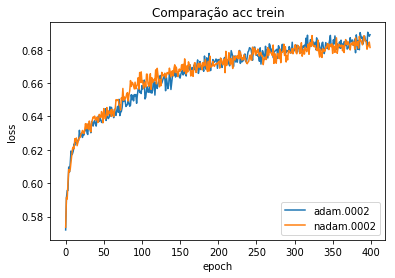

In [46]:
plt.plot(history4.history['acc'])
plt.plot(history5.history['acc'])

plt.title('Comparação acc trein')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam.0002','nadam.0002'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

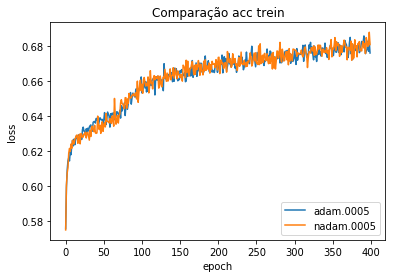

In [47]:
plt.plot(history6.history['acc'])
plt.plot(history7.history['acc'])


plt.title('Comparação acc trein')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam.0005','nadam.0005'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

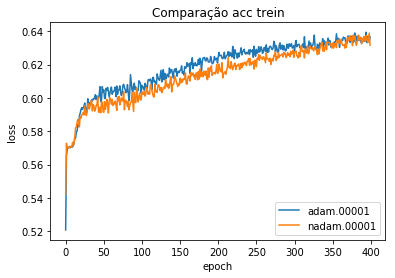

In [48]:
plt.plot(history8.history['acc'])
plt.plot(history9.history['acc'])


plt.title('Comparação acc trein')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam.00001','nadam.00001'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

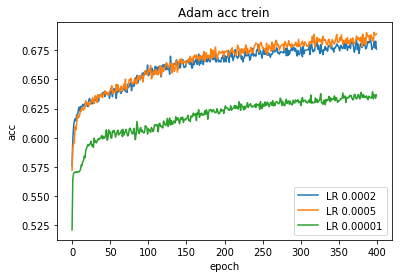

In [49]:

plt.plot(history6.history['acc'])
plt.plot(history4.history['acc'])
plt.plot(history8.history['acc'])


plt.title('Adam acc trein')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['LR 0.0002','LR 0.0005','LR 0.00001'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

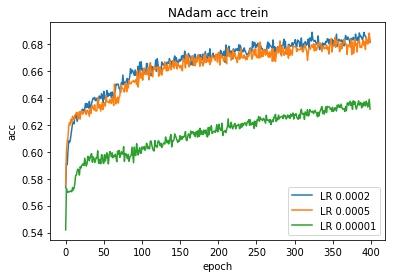

In [50]:

plt.plot(history5.history['acc'])
plt.plot(history7.history['acc'])
plt.plot(history9.history['acc'])


plt.title('NAdam acc trein')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['LR 0.0002','LR 0.0005','LR 0.00001'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

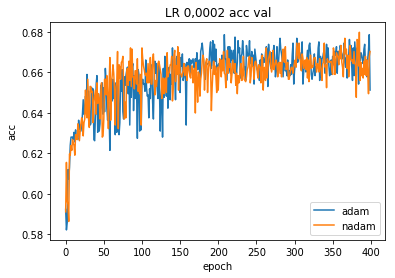

In [51]:
plt.plot(history4.history['val_acc'])
plt.plot(history5.history['val_acc'])

plt.title('LR 0,0002 acc val')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['adam','nadam'],loc='lower right')
plt.show


<function matplotlib.pyplot.show>

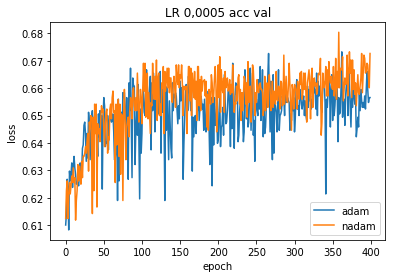

In [52]:
plt.plot(history6.history['val_acc'])
plt.plot(history7.history['val_acc'])


plt.title('LR 0,0005 acc val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

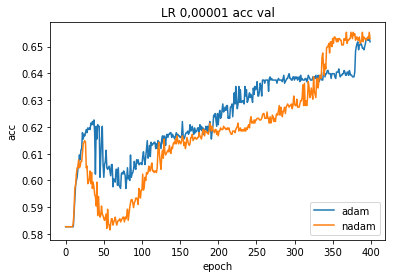

In [53]:
plt.plot(history8.history['val_acc'])
plt.plot(history9.history['val_acc'])


plt.title('LR 0,00001 acc val')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['adam','nadam'],loc='lower right')
plt.show

<function matplotlib.pyplot.show>

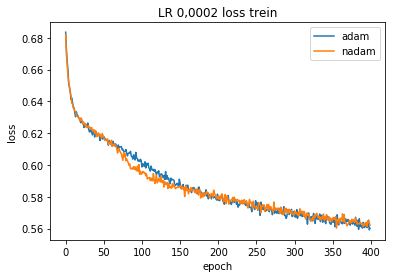

In [54]:
plt.plot(history4.history['loss'])
plt.plot(history5.history['loss'])

plt.title('LR 0,0002 loss trein')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam'],loc='upper right')
plt.show

<function matplotlib.pyplot.show>

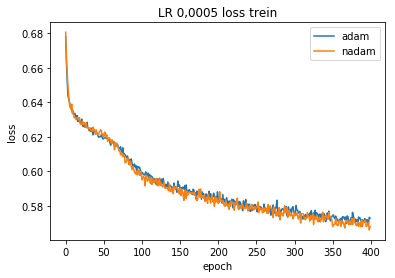

In [55]:

plt.plot(history6.history['loss'])
plt.plot(history7.history['loss'])
plt.title('LR 0,0005 loss trein')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam'],loc='upper right')
plt.show

<function matplotlib.pyplot.show>

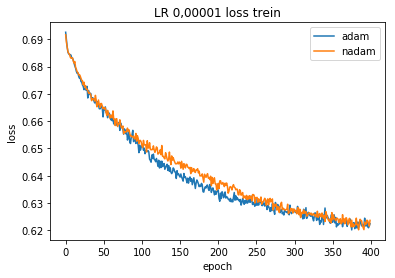

In [56]:

plt.plot(history8.history['loss'])
plt.plot(history9.history['loss'])
plt.title('LR 0,00001 loss trein')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam'],loc='upper right')
plt.show

<function matplotlib.pyplot.show>

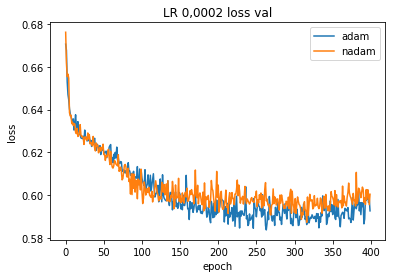

In [57]:
plt.plot(history4.history['val_loss'])
plt.plot(history5.history['val_loss'])



plt.title('LR 0,0002 loss val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam'],loc='upper right')
plt.show

<function matplotlib.pyplot.show>

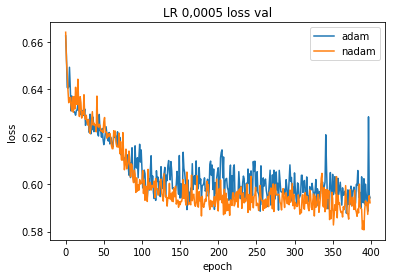

In [58]:

plt.plot(history6.history['val_loss'])
plt.plot(history7.history['val_loss'])
plt.title('LR 0,0005 loss val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam'],loc='upper right')
plt.show

<function matplotlib.pyplot.show>

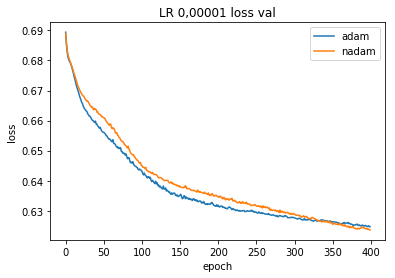

In [59]:
plt.plot(history8.history['val_loss'])
plt.plot(history9.history['val_loss'])
plt.title('LR 0,00001 loss val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['adam','nadam'],loc='upper right')
plt.show